In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/pallavi385/Downloads/heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
count=df['target'].value_counts()

In [5]:
count

1    165
0    138
Name: target, dtype: int64

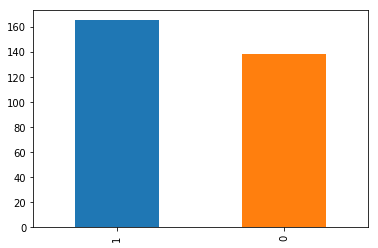

In [6]:
count.plot(kind="bar")

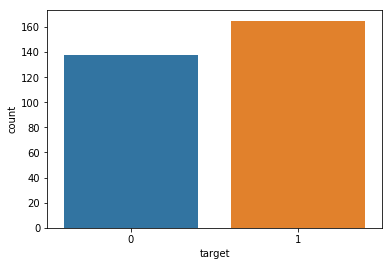

In [8]:
sns.countplot(x="target",data=df)

In [10]:
NoDisease=len(df[df.target==0])
Disease=len(df[df.target==1])

In [13]:
print("No Disease  "+str(NoDisease))
print("Disease " +str(Disease))

No Disease  138
Disease 165


Text(0.5, 0, 'sex(0=female, 1 = male)')

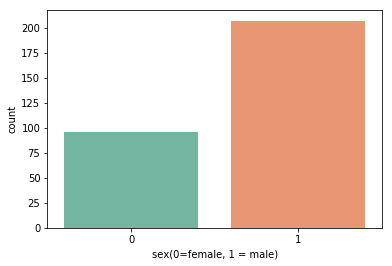

In [17]:
sns.countplot(x="sex",data=df,palette="Set2")
plt.xlabel("sex(0=female, 1 = male)")

In [43]:
#female patients
Female_patients= len(df[df["sex"]==0])

In [44]:
Female_patients

96

In [20]:
#male patients
Male_patients=len(df[df.sex==1])

In [45]:
Male_patients

207

In [ ]:
#Logisitic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 

In [22]:
x=df.iloc[:,:-1].values
y=df.iloc[:,13].values

In [23]:
lr=LogisticRegression()

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [25]:
lr.fit(x_train,y_train)

/Users/pallavi385/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
print("Test Accuracy {:.2f}%".format(lr.score(x_test,y_test)*100))

Test Accuracy 85.25%


In [27]:
y_pred=lr.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [29]:
cm

array([[22,  5],
       [ 4, 30]])

In [30]:
accuracy=(22+30)/(22+5+4+30)

In [32]:
accuracy*100

85.24590163934425

In [33]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
from sklearn .metrics import confusion_matrix
cm1=confusion_matrix(y_test,knn_pred)

In [34]:
cm1

array([[18,  9],
       [11, 23]])

In [35]:
acc_knn=(18+23)/(18+11+9+23)

In [36]:
acc_knn

0.6721311475409836

In [ ]:
#svm

In [37]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)
svm.fit(x_train, y_train)

/Users/pallavi385/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=1,
  shrinking=True, tol=0.001, verbose=False)

In [38]:
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(svm.score(x_test,y_test)*100))

Test Accuracy of SVM Algorithm: 59.02%


In [ ]:
#Gaussian NB

In [39]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
print("Accuracy of Naive Bayes: {:.2f}%".format(nb.score(x_test,y_test)*100))

Accuracy of Naive Bayes: 85.25%


In [ ]:
#decision tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc.score(x_test, y_test)*100))

Decision Tree Test Accuracy 80.33%


In [41]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(x_train, y_train)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf.score(x_test,y_test)*100))

Random Forest Algorithm Accuracy Score : 85.25%
